In [1]:
import pandas as pd
import seaborn as sb
from datetime import datetime
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load Data

## Eye states

In [3]:
eye_states = pd.read_csv('/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking/data/eye-tracking/screen classification/3d_eye_states.csv')

In [13]:
eye_states

,section_id,recording_id,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,eyeball_center_rx,eyeball_center_ry,eyeball_center_rz,optical_axis_lx,optical_axis_ly,optical_axis_lz,optical_axis_rx,optical_axis_ry,optical_axis_rz
0,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525860716129,6.101728,-31.029068,15.071472,-39.422306,31.820908,11.971153,-39.190109,0.144663,0.468310,0.871642,-0.034506,0.473891,0.879907
1,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525865716129,6.073446,-31.089268,15.178902,-39.486629,31.755999,11.989693,-39.134827,0.147503,0.467870,0.871402,-0.035947,0.474145,0.879713
2,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525880716129,6.038457,-31.224716,15.223293,-39.728813,31.636583,12.007866,-38.772366,0.128238,0.496139,0.858721,-0.064160,0.502148,0.862399
3,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525885716129,6.053344,-31.080765,15.304230,-39.670540,31.754585,12.075443,-38.942024,0.125351,0.499520,0.857186,-0.063735,0.504788,0.860887
4,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525890716129,6.086000,-30.974659,15.438278,-39.648087,31.854034,12.193230,-39.066711,0.126803,0.497687,0.858038,-0.064919,0.502313,0.862245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707241060006397129,5.788313,-31.740650,15.217152,-39.875343,31.146263,12.355568,-38.723579,0.036540,-0.120045,0.992096,-0.091473,-0.123193,0.988158
103882,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707241060011397129,6.001334,-30.980228,14.236740,-39.625092,31.908661,11.206772,-38.306450,0.084920,0.407005,0.909470,-0.113624,0.402150,0.908496
103883,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707241060016397129,6.009223,-31.004936,14.230232,-39.661438,31.886002,11.179157,-38.451202,0.084683,0.404915,0.910425,-0.109446,0.400478,0.909747
103884,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707241060021397129,6.003671,-30.999676,14.164185,-39.623611,31.896914,11.145077,-38.290756,0.084236,0.410721,0.907862,-0.115785,0.406701,0.906194


In [5]:
eye_states.shape

(103886, 16)

In [6]:
eye_states.columns

Index(['section id', 'recording id', 'timestamp [ns]', 'pupil diameter [mm]',
       'eyeball center left x [mm]', 'eyeball center left y [mm]',
       'eyeball center left z [mm]', 'eyeball center right x [mm]',
       'eyeball center right y [mm]', 'eyeball center right z [mm]',
       'optical axis left x', 'optical axis left y', 'optical axis left z',
       'optical axis right x', 'optical axis right y', 'optical axis right z'],
      dtype='object')

In [7]:
column_names_states = {'section id': 'section_id',
                       'recording id': 'recording_id',
                       'timestamp [ns]': 'timestamp',
                       'pupil diameter [mm]': 'pupil_diameter',
                       'eyeball center left x [mm]': 'eyeball_center_lx',
                       'eyeball center left y [mm]': 'eyeball_center_ly',
                       'eyeball center left z [mm]': 'eyeball_center_lz',
                       'eyeball center right x [mm]': 'eyeball_center_rx',
                       'eyeball center right y [mm]': 'eyeball_center_ry',
                       'eyeball center right z [mm]': 'eyeball_center_rz',
                       'optical axis left x': 'optical_axis_lx',
                       'optical axis left y': 'optical_axis_ly',
                       'optical axis left z': 'optical_axis_lz',
                       'optical axis right x': 'optical_axis_rx',
                       'optical axis right y': 'optical_axis_ry',
                       'optical axis right z': 'optical_axis_rz'}

eye_states = eye_states.rename(columns=column_names_states)

In [12]:
eye_states

,section_id,recording_id,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,eyeball_center_rx,eyeball_center_ry,eyeball_center_rz,optical_axis_lx,optical_axis_ly,optical_axis_lz,optical_axis_rx,optical_axis_ry,optical_axis_rz
0,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525860716129,6.101728,-31.029068,15.071472,-39.422306,31.820908,11.971153,-39.190109,0.144663,0.468310,0.871642,-0.034506,0.473891,0.879907
1,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525865716129,6.073446,-31.089268,15.178902,-39.486629,31.755999,11.989693,-39.134827,0.147503,0.467870,0.871402,-0.035947,0.474145,0.879713
2,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525880716129,6.038457,-31.224716,15.223293,-39.728813,31.636583,12.007866,-38.772366,0.128238,0.496139,0.858721,-0.064160,0.502148,0.862399
3,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525885716129,6.053344,-31.080765,15.304230,-39.670540,31.754585,12.075443,-38.942024,0.125351,0.499520,0.857186,-0.063735,0.504788,0.860887
4,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525890716129,6.086000,-30.974659,15.438278,-39.648087,31.854034,12.193230,-39.066711,0.126803,0.497687,0.858038,-0.064919,0.502313,0.862245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707241060006397129,5.788313,-31.740650,15.217152,-39.875343,31.146263,12.355568,-38.723579,0.036540,-0.120045,0.992096,-0.091473,-0.123193,0.988158
103882,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707241060011397129,6.001334,-30.980228,14.236740,-39.625092,31.908661,11.206772,-38.306450,0.084920,0.407005,0.909470,-0.113624,0.402150,0.908496
103883,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707241060016397129,6.009223,-31.004936,14.230232,-39.661438,31.886002,11.179157,-38.451202,0.084683,0.404915,0.910425,-0.109446,0.400478,0.909747
103884,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707241060021397129,6.003671,-30.999676,14.164185,-39.623611,31.896914,11.145077,-38.290756,0.084236,0.410721,0.907862,-0.115785,0.406701,0.906194


In [9]:
eye_states_short = eye_states[['timestamp', 'pupil_diameter', 'eyeball_center_lx', 'eyeball_center_ly', 'eyeball_center_lz', 'optical_axis_lx', 'optical_axis_ly', 'optical_axis_lz']]

In [11]:
eye_states_short

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz
0,1707240525860716129,6.101728,-31.029068,15.071472,-39.422306,0.144663,0.468310,0.871642
1,1707240525865716129,6.073446,-31.089268,15.178902,-39.486629,0.147503,0.467870,0.871402
2,1707240525880716129,6.038457,-31.224716,15.223293,-39.728813,0.128238,0.496139,0.858721
3,1707240525885716129,6.053344,-31.080765,15.304230,-39.670540,0.125351,0.499520,0.857186
4,1707240525890716129,6.086000,-30.974659,15.438278,-39.648087,0.126803,0.497687,0.858038
...,...,...,...,...,...,...,...,...
103881,1707241060006397129,5.788313,-31.740650,15.217152,-39.875343,0.036540,-0.120045,0.992096
103882,1707241060011397129,6.001334,-30.980228,14.236740,-39.625092,0.084920,0.407005,0.909470
103883,1707241060016397129,6.009223,-31.004936,14.230232,-39.661438,0.084683,0.404915,0.910425
103884,1707241060021397129,6.003671,-30.999676,14.164185,-39.623611,0.084236,0.410721,0.907862


## Gaze

In [14]:
gaze = pd.read_csv('/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking/data/eye-tracking/screen classification/gaze.csv')

In [16]:
gaze

,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id,azimuth [deg],elevation [deg]
0,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525860716129,880.009,986.375,1.0,NaN,NaN,5.005893,-24.366639
1,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525865716129,875.569,996.474,1.0,NaN,NaN,4.715383,-25.020426
2,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525880716129,866.565,1027.974,1.0,NaN,NaN,4.139349,-27.054938
3,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525885716129,861.566,1029.880,1.0,NaN,NaN,3.791460,-27.181279
4,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525890716129,866.758,1033.953,1.0,1.0,NaN,4.162807,-27.439662
...,...,...,...,...,...,...,...,...,...,...
103881,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707241060006397129,755.804,428.002,1.0,NaN,NaN,-3.434057,11.911848
103882,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707241060011397129,816.558,908.598,1.0,NaN,NaN,0.600762,-19.378063
103883,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707241060016397129,814.048,910.749,1.0,NaN,NaN,0.431305,-19.517137
103884,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707241060021397129,817.503,911.561,1.0,NaN,NaN,0.665301,-19.569471


In [17]:
column_names_gaze = {'section id' : 'section_id',
                     'recording id' : 'recording_id',
                     'timestamp [ns]' : 'timestamp',
                     'gaze x [px]' : 'gaze_x',
                     'gaze y [px]' : 'gaze_y',
                     'fixation id' : 'fixation_id',
                     'blink id' : 'blink_id',
                     'azimuth [deg]' : 'azimuth',
                     'elevation [deg]' : 'elevation'}

gaze = gaze.rename(columns=column_names_gaze)

In [18]:
gaze_short = gaze[['timestamp', 'gaze_x', 'gaze_y', 'azimuth', 'elevation']]

## Events

In [19]:
events = pd.read_csv('/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking/data/eye-tracking/screen classification/events.csv')

In [20]:
events

,recording id,timestamp [ns],name,type
0,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240520721000000,recording.begin,recording
1,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240554055752000,right_screen.start,cloud
2,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240554649661000,right_screen.end,cloud
3,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240554889807000,other_buttons.start,cloud
4,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240557287815000,other_buttons.end,cloud
5,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240557466509000,main_screen.start,cloud
6,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240558234231000,main_screen.end,cloud
7,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240558350757000,other_buttons.start,cloud
8,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240560033305000,other_buttons.end,cloud
9,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240560245110000,main_screen.start,cloud


In [21]:
events.columns

Index(['recording id', 'timestamp [ns]', 'name', 'type'], dtype='object')

In [22]:
events = events.rename(columns={'recording id' : 'recording_id', 'timestamp [ns]' : 'timestamp'})

In [23]:
events

,recording_id,timestamp,name,type
0,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240520721000000,recording.begin,recording
1,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240554055752000,right_screen.start,cloud
2,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240554649661000,right_screen.end,cloud
3,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240554889807000,other_buttons.start,cloud
4,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240557287815000,other_buttons.end,cloud
5,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240557466509000,main_screen.start,cloud
6,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240558234231000,main_screen.end,cloud
7,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240558350757000,other_buttons.start,cloud
8,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240560033305000,other_buttons.end,cloud
9,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240560245110000,main_screen.start,cloud


In [24]:
events_short = events[['timestamp', 'name']]

# Merge datasets

In [25]:
eye_states_gaze = eye_states_short.merge(gaze_short, on='timestamp')

In [26]:
eye_states_gaze

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation
0,1707240525860716129,6.101728,-31.029068,15.071472,-39.422306,0.144663,0.468310,0.871642,880.009,986.375,5.005893,-24.366639
1,1707240525865716129,6.073446,-31.089268,15.178902,-39.486629,0.147503,0.467870,0.871402,875.569,996.474,4.715383,-25.020426
2,1707240525880716129,6.038457,-31.224716,15.223293,-39.728813,0.128238,0.496139,0.858721,866.565,1027.974,4.139349,-27.054938
3,1707240525885716129,6.053344,-31.080765,15.304230,-39.670540,0.125351,0.499520,0.857186,861.566,1029.880,3.791460,-27.181279
4,1707240525890716129,6.086000,-30.974659,15.438278,-39.648087,0.126803,0.497687,0.858038,866.758,1033.953,4.162807,-27.439662
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,1707241060006397129,5.788313,-31.740650,15.217152,-39.875343,0.036540,-0.120045,0.992096,755.804,428.002,-3.434057,11.911848
103882,1707241060011397129,6.001334,-30.980228,14.236740,-39.625092,0.084920,0.407005,0.909470,816.558,908.598,0.600762,-19.378063
103883,1707241060016397129,6.009223,-31.004936,14.230232,-39.661438,0.084683,0.404915,0.910425,814.048,910.749,0.431305,-19.517137
103884,1707241060021397129,6.003671,-30.999676,14.164185,-39.623611,0.084236,0.410721,0.907862,817.503,911.561,0.665301,-19.569471


In [28]:
eye_states_gaze_events = eye_states_gaze.merge(events_short, how='outer', on='timestamp')

In [29]:
eye_states_gaze_events

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name
0,1707240525860716129,6.101728,-31.029068,15.071472,-39.422306,0.144663,0.468310,0.871642,880.009,986.375,5.005893,-24.366639,NaN
1,1707240525865716129,6.073446,-31.089268,15.178902,-39.486629,0.147503,0.467870,0.871402,875.569,996.474,4.715383,-25.020426,NaN
2,1707240525880716129,6.038457,-31.224716,15.223293,-39.728813,0.128238,0.496139,0.858721,866.565,1027.974,4.139349,-27.054938,NaN
3,1707240525885716129,6.053344,-31.080765,15.304230,-39.670540,0.125351,0.499520,0.857186,861.566,1029.880,3.791460,-27.181279,NaN
4,1707240525890716129,6.086000,-30.974659,15.438278,-39.648087,0.126803,0.497687,0.858038,866.758,1033.953,4.162807,-27.439662,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103919,1707240620171284000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,navigation_parameters.starts
103920,1707240620740565000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,navigation_parameters.end
103921,1707240624085011000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,navigation_parameters.starts
103922,1707240638836950000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,navigation_parameters.end


In [30]:
sorted_data = eye_states_gaze_events.sort_values('timestamp').reset_index()

In [31]:
sorted_data

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name
0,103886,1707240520721000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,recording.begin
1,0,1707240525860716129,6.101728,-31.029068,15.071472,-39.422306,0.144663,0.468310,0.871642,880.009,986.375,5.005893,-24.366639,NaN
2,1,1707240525865716129,6.073446,-31.089268,15.178902,-39.486629,0.147503,0.467870,0.871402,875.569,996.474,4.715383,-25.020426,NaN
3,2,1707240525880716129,6.038457,-31.224716,15.223293,-39.728813,0.128238,0.496139,0.858721,866.565,1027.974,4.139349,-27.054938,NaN
4,3,1707240525885716129,6.053344,-31.080765,15.304230,-39.670540,0.125351,0.499520,0.857186,861.566,1029.880,3.791460,-27.181279,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103919,103882,1707241060011397129,6.001334,-30.980228,14.236740,-39.625092,0.084920,0.407005,0.909470,816.558,908.598,0.600762,-19.378063,NaN
103920,103883,1707241060016397129,6.009223,-31.004936,14.230232,-39.661438,0.084683,0.404915,0.910425,814.048,910.749,0.431305,-19.517137,NaN
103921,103884,1707241060021397129,6.003671,-30.999676,14.164185,-39.623611,0.084236,0.410721,0.907862,817.503,911.561,0.665301,-19.569471,NaN
103922,103885,1707241060026397129,5.825497,-31.715012,15.375488,-40.032200,0.024528,-0.132906,0.990825,758.063,423.015,-3.287020,12.236596,NaN


# Timestamps to date

In [32]:
sorted_data['timestamp_data'] = [datetime.fromtimestamp(ts // 1000000000) for ts in sorted_data['timestamp']]

In [35]:
sorted_data

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,103886,1707240520721000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,recording.begin,2024-02-06 12:28:40
1,0,1707240525860716129,6.101728,-31.029068,15.071472,-39.422306,0.144663,0.468310,0.871642,880.009,986.375,5.005893,-24.366639,NaN,2024-02-06 12:28:45
2,1,1707240525865716129,6.073446,-31.089268,15.178902,-39.486629,0.147503,0.467870,0.871402,875.569,996.474,4.715383,-25.020426,NaN,2024-02-06 12:28:45
3,2,1707240525880716129,6.038457,-31.224716,15.223293,-39.728813,0.128238,0.496139,0.858721,866.565,1027.974,4.139349,-27.054938,NaN,2024-02-06 12:28:45
4,3,1707240525885716129,6.053344,-31.080765,15.304230,-39.670540,0.125351,0.499520,0.857186,861.566,1029.880,3.791460,-27.181279,NaN,2024-02-06 12:28:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103919,103882,1707241060011397129,6.001334,-30.980228,14.236740,-39.625092,0.084920,0.407005,0.909470,816.558,908.598,0.600762,-19.378063,NaN,2024-02-06 12:37:40
103920,103883,1707241060016397129,6.009223,-31.004936,14.230232,-39.661438,0.084683,0.404915,0.910425,814.048,910.749,0.431305,-19.517137,NaN,2024-02-06 12:37:40
103921,103884,1707241060021397129,6.003671,-30.999676,14.164185,-39.623611,0.084236,0.410721,0.907862,817.503,911.561,0.665301,-19.569471,NaN,2024-02-06 12:37:40
103922,103885,1707241060026397129,5.825497,-31.715012,15.375488,-40.032200,0.024528,-0.132906,0.990825,758.063,423.015,-3.287020,12.236596,NaN,2024-02-06 12:37:40


# Separate flight simulator parts

## Navigation parameters

In [36]:
filtered_nav_par_indexes = sorted_data[(sorted_data['name'] == 'navigation_parameters.starts') |
                                       (sorted_data['name'] == 'navigation_parameters.end')].index

In [40]:
filtered_nav_par_indexes

Index([5002, 5132, 5477, 5549, 12589, 13126, 13503, 14703, 16358, 16473, 17142,
       20090],
      dtype='int64')

In [41]:
filtered_nav_par = pd.DataFrame()
for i in range(0, len(filtered_nav_par_indexes), 2):
    filtered_nav_par = pd.concat([filtered_nav_par, sorted_data.loc[filtered_nav_par_indexes[i]:filtered_nav_par_indexes[i+1]]])

In [42]:
filtered_nav_par

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
5002,103897,1707240561312019000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,navigation_parameters.starts,2024-02-06 12:29:21
5003,4991,1707240561313651129,4.480158,-31.848492,15.027313,-40.767693,-0.131422,0.188677,0.973206,620.994,724.002,-12.227112,-7.322114,NaN,2024-02-06 12:29:21
5004,4992,1707240561318651129,4.461890,-31.740986,14.920807,-40.577309,-0.146993,0.199509,0.968808,604.379,721.965,-13.307777,-7.178110,NaN,2024-02-06 12:29:21
5005,4993,1707240561323651129,4.472579,-31.888535,14.879459,-40.636887,-0.134085,0.202673,0.970023,607.474,722.908,-13.107219,-7.241319,NaN,2024-02-06 12:29:21
5006,4994,1707240561328651129,4.471656,-31.938229,14.927616,-40.713192,-0.125388,0.198850,0.971976,620.031,727.042,-12.293126,-7.517690,NaN,2024-02-06 12:29:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20086,20050,1707240638821429129,4.519628,-31.734314,15.325447,-39.682106,0.191006,0.115066,0.974821,906.588,661.669,6.458662,-3.317144,NaN,2024-02-06 12:30:38
20087,20051,1707240638826426129,4.510226,-31.644176,15.340992,-39.623024,0.187213,0.113478,0.975743,905.999,659.781,6.419678,-3.194190,NaN,2024-02-06 12:30:38
20088,20052,1707240638831426129,4.520718,-31.669365,15.244736,-39.624947,0.188392,0.122683,0.974401,903.434,656.354,6.251449,-2.971291,NaN,2024-02-06 12:30:38
20089,20053,1707240638836425129,4.507725,-31.624622,15.250801,-39.576454,0.186134,0.121120,0.975030,899.195,661.348,5.975715,-3.297409,NaN,2024-02-06 12:30:38


In [43]:
filtered_nav_par['name'] = filtered_nav_par['name'].apply(lambda x: 'navigation parameters' if pd.isna(x) else x)

In [44]:
filtered_nav_par

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
5002,103897,1707240561312019000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,navigation_parameters.starts,2024-02-06 12:29:21
5003,4991,1707240561313651129,4.480158,-31.848492,15.027313,-40.767693,-0.131422,0.188677,0.973206,620.994,724.002,-12.227112,-7.322114,navigation parameters,2024-02-06 12:29:21
5004,4992,1707240561318651129,4.461890,-31.740986,14.920807,-40.577309,-0.146993,0.199509,0.968808,604.379,721.965,-13.307777,-7.178110,navigation parameters,2024-02-06 12:29:21
5005,4993,1707240561323651129,4.472579,-31.888535,14.879459,-40.636887,-0.134085,0.202673,0.970023,607.474,722.908,-13.107219,-7.241319,navigation parameters,2024-02-06 12:29:21
5006,4994,1707240561328651129,4.471656,-31.938229,14.927616,-40.713192,-0.125388,0.198850,0.971976,620.031,727.042,-12.293126,-7.517690,navigation parameters,2024-02-06 12:29:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20086,20050,1707240638821429129,4.519628,-31.734314,15.325447,-39.682106,0.191006,0.115066,0.974821,906.588,661.669,6.458662,-3.317144,navigation parameters,2024-02-06 12:30:38
20087,20051,1707240638826426129,4.510226,-31.644176,15.340992,-39.623024,0.187213,0.113478,0.975743,905.999,659.781,6.419678,-3.194190,navigation parameters,2024-02-06 12:30:38
20088,20052,1707240638831426129,4.520718,-31.669365,15.244736,-39.624947,0.188392,0.122683,0.974401,903.434,656.354,6.251449,-2.971291,navigation parameters,2024-02-06 12:30:38
20089,20053,1707240638836425129,4.507725,-31.624622,15.250801,-39.576454,0.186134,0.121120,0.975030,899.195,661.348,5.975715,-3.297409,navigation parameters,2024-02-06 12:30:38


In [45]:
navigation_parameters = filtered_nav_par.dropna().reset_index(drop=True)

In [46]:
navigation_parameters

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,4991,1707240561313651129,4.480158,-31.848492,15.027313,-40.767693,-0.131422,0.188677,0.973206,620.994,724.002,-12.227112,-7.322114,navigation parameters,2024-02-06 12:29:21
1,4992,1707240561318651129,4.461890,-31.740986,14.920807,-40.577309,-0.146993,0.199509,0.968808,604.379,721.965,-13.307777,-7.178110,navigation parameters,2024-02-06 12:29:21
2,4993,1707240561323651129,4.472579,-31.888535,14.879459,-40.636887,-0.134085,0.202673,0.970023,607.474,722.908,-13.107219,-7.241319,navigation parameters,2024-02-06 12:29:21
3,4994,1707240561328651129,4.471656,-31.938229,14.927616,-40.713192,-0.125388,0.198850,0.971976,620.031,727.042,-12.293126,-7.517690,navigation parameters,2024-02-06 12:29:21
4,4995,1707240561333655129,4.504901,-31.740700,14.965969,-40.300785,-0.057367,0.217623,0.974346,693.851,740.396,-7.478144,-8.430699,navigation parameters,2024-02-06 12:29:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,20049,1707240638816426129,4.522227,-31.691917,15.256584,-39.696262,0.186581,0.120968,0.974964,903.361,665.907,6.248994,-3.593811,navigation parameters,2024-02-06 12:30:38
4992,20050,1707240638821429129,4.519628,-31.734314,15.325447,-39.682106,0.191006,0.115066,0.974821,906.588,661.669,6.458662,-3.317144,navigation parameters,2024-02-06 12:30:38
4993,20051,1707240638826426129,4.510226,-31.644176,15.340992,-39.623024,0.187213,0.113478,0.975743,905.999,659.781,6.419678,-3.194190,navigation parameters,2024-02-06 12:30:38
4994,20052,1707240638831426129,4.520718,-31.669365,15.244736,-39.624947,0.188392,0.122683,0.974401,903.434,656.354,6.251449,-2.971291,navigation parameters,2024-02-06 12:30:38


## Main screen

In [47]:
filtered_main_indexes = sorted_data[(sorted_data['name'] == 'main_screen.start') |
                                       (sorted_data['name'] == 'main_screen.end')].index

In [48]:
filtered_main_indexes

Index([4361, 4491, 4813, 4968, 5277, 5421, 5621, 5646, 10519, 10567, 15005,
       15024],
      dtype='int64')

In [49]:
filtered_main = pd.DataFrame()
for i in range(0, len(filtered_main_indexes), 2):
    filtered_main = pd.concat([filtered_main, sorted_data.loc[filtered_main_indexes[i]:filtered_main_indexes[i+1]]])

In [52]:
filtered_main.head(2)

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
4361,103891,1707240557466509000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,main_screen.start,2024-02-06 12:29:17
4362,4356,1707240557470132129,6.087544,-31.950706,15.86528,-39.885796,0.098015,-0.086471,0.991421,817.824,449.325,0.665227,10.5345,NaN,2024-02-06 12:29:17


In [53]:
filtered_main['name'] = filtered_main['name'].apply(lambda x: 'main screen' if pd.isna(x) else x)

In [54]:
filtered_main.head(2)

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
4361,103891,1707240557466509000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,main_screen.start,2024-02-06 12:29:17
4362,4356,1707240557470132129,6.087544,-31.950706,15.86528,-39.885796,0.098015,-0.086471,0.991421,817.824,449.325,0.665227,10.5345,main screen,2024-02-06 12:29:17


In [55]:
main_screen = filtered_main.dropna().reset_index(drop=True)

In [56]:
main_screen.head(2)

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,4356,1707240557470132129,6.087544,-31.950706,15.865280,-39.885796,0.098015,-0.086471,0.991421,817.824,449.325,0.665227,10.534500,main screen,2024-02-06 12:29:17
1,4357,1707240557475132129,6.081301,-31.709511,15.842545,-39.810513,0.093039,-0.089415,0.991639,821.094,447.444,0.881143,10.656784,main screen,2024-02-06 12:29:17


In [57]:
main_screen.shape

(515, 15)

## Right screen

In [58]:
filtered_right_indexes = sorted_data[(sorted_data['name'] == 'right_screen.start') |
                                       (sorted_data['name'] == 'right_screen.end')].index

In [59]:
filtered_right_indexes

Index([3802, 3913, 10954, 11095], dtype='int64')

In [60]:
filtered_right = pd.DataFrame()
for i in range(0, len(filtered_right_indexes), 2):
    filtered_right  = pd.concat([filtered_right, sorted_data.loc[filtered_right_indexes[i]:filtered_right_indexes[i+1]]])

In [61]:
filtered_right.head(2)

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
3802,103887,1707240554055752000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_screen.start,2024-02-06 12:29:14
3803,3801,1707240554056864129,6.020391,-31.397358,15.432617,-38.729904,0.251825,0.03638,0.967089,970.994,570.496,10.656527,2.613362,NaN,2024-02-06 12:29:14


In [62]:
filtered_right['name'] = filtered_right['name'].apply(lambda x: 'right screen' if pd.isna(x) else x)

In [63]:
filtered_right.head(2)

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
3802,103887,1707240554055752000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_screen.start,2024-02-06 12:29:14
3803,3801,1707240554056864129,6.020391,-31.397358,15.432617,-38.729904,0.251825,0.03638,0.967089,970.994,570.496,10.656527,2.613362,right screen,2024-02-06 12:29:14


In [64]:
right_screen = filtered_right.dropna().reset_index(drop=True)

In [65]:
right_screen.head(2)

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,3801,1707240554056864129,6.020391,-31.397358,15.432617,-38.729904,0.251825,0.036380,0.967089,970.994,570.496,10.656527,2.613362,right screen,2024-02-06 12:29:14
1,3802,1707240554061864129,6.057449,-31.442722,15.366661,-38.730469,0.257955,0.041898,0.965248,973.262,574.044,10.803142,2.382732,right screen,2024-02-06 12:29:14


In [66]:
right_screen.shape

(250, 15)

## Other buttons

In [67]:
filtered_buttons_indexes = sorted_data[(sorted_data['name'] == 'other_buttons.start') |
                                       (sorted_data['name'] == 'other_buttons.end')].index

In [68]:
filtered_buttons_indexes

Index([3950, 4333, 4504, 4774, 5146, 5258, 6134, 9239], dtype='int64')

In [69]:
filtered_buttons = pd.DataFrame()
for i in range(0, len(filtered_buttons_indexes), 2):
    filtered_buttons = pd.concat([filtered_buttons, sorted_data.loc[filtered_buttons_indexes[i]:filtered_buttons_indexes[i+1]]])

In [70]:
filtered_buttons.head(2)

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
3950,103889,1707240554889807000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other_buttons.start,2024-02-06 12:29:14
3951,3947,1707240554892744129,5.120378,-31.891327,14.763153,-39.358105,0.082142,0.36802,0.926182,778.918,869.787,-1.929059,-16.863153,NaN,2024-02-06 12:29:14


In [71]:
filtered_buttons['name'] = filtered_buttons['name'].apply(lambda x: 'other buttons' if pd.isna(x) else x)

In [72]:
filtered_buttons.head(2)

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
3950,103889,1707240554889807000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other_buttons.start,2024-02-06 12:29:14
3951,3947,1707240554892744129,5.120378,-31.891327,14.763153,-39.358105,0.082142,0.36802,0.926182,778.918,869.787,-1.929059,-16.863153,other buttons,2024-02-06 12:29:14


In [73]:
other_buttons = filtered_buttons.dropna().reset_index(drop=True)

In [74]:
other_buttons.head(2)

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,3947,1707240554892744129,5.120378,-31.891327,14.763153,-39.358105,0.082142,0.368020,0.926182,778.918,869.787,-1.929059,-16.863153,other buttons,2024-02-06 12:29:14
1,3948,1707240554897629129,5.122826,-31.889763,14.767155,-39.371407,0.081313,0.368007,0.926261,779.021,868.544,-1.921718,-16.782706,other buttons,2024-02-06 12:29:14


In [75]:
other_buttons.shape

(3866, 15)

# Select data for ML

In [76]:
labeled_data = pd.concat([navigation_parameters, main_screen, right_screen, other_buttons], axis=0)

In [77]:
labeled_data.shape

(9627, 15)

In [78]:
labeled_data

,index,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,4991,1707240561313651129,4.480158,-31.848492,15.027313,-40.767693,-0.131422,0.188677,0.973206,620.994,724.002,-12.227112,-7.322114,navigation parameters,2024-02-06 12:29:21
1,4992,1707240561318651129,4.461890,-31.740986,14.920807,-40.577309,-0.146993,0.199509,0.968808,604.379,721.965,-13.307777,-7.178110,navigation parameters,2024-02-06 12:29:21
2,4993,1707240561323651129,4.472579,-31.888535,14.879459,-40.636887,-0.134085,0.202673,0.970023,607.474,722.908,-13.107219,-7.241319,navigation parameters,2024-02-06 12:29:21
3,4994,1707240561328651129,4.471656,-31.938229,14.927616,-40.713192,-0.125388,0.198850,0.971976,620.031,727.042,-12.293126,-7.517690,navigation parameters,2024-02-06 12:29:21
4,4995,1707240561333655129,4.504901,-31.740700,14.965969,-40.300785,-0.057367,0.217623,0.974346,693.851,740.396,-7.478144,-8.430699,navigation parameters,2024-02-06 12:29:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,9212,1707240584445138129,6.270321,-31.265942,15.906315,-38.561310,0.274564,0.058350,0.959797,957.266,623.640,9.756520,-0.836065,other buttons,2024-02-06 12:29:44
3862,9213,1707240584450138129,6.252627,-31.293312,15.860954,-38.555252,0.275916,0.062042,0.959177,958.005,626.172,9.804929,-1.000529,other buttons,2024-02-06 12:29:44
3863,9214,1707240584455138129,6.256514,-31.278946,15.843998,-38.518799,0.274426,0.062619,0.959567,958.601,627.357,9.843905,-1.077439,other buttons,2024-02-06 12:29:44
3864,9215,1707240584460153129,6.272739,-31.317513,15.898399,-38.579754,0.274298,0.057746,0.959909,956.849,625.900,9.729619,-0.982933,other buttons,2024-02-06 12:29:44


In [79]:
labeled_data.columns

Index(['index', 'timestamp', 'pupil_diameter', 'eyeball_center_lx',
       'eyeball_center_ly', 'eyeball_center_lz', 'optical_axis_lx',
       'optical_axis_ly', 'optical_axis_lz', 'gaze_x', 'gaze_y', 'azimuth',
       'elevation', 'name', 'timestamp_data'],
      dtype='object')

In [80]:
X_to_corr = labeled_data[['pupil_diameter', 'eyeball_center_lx', 'eyeball_center_ly', 'azimuth',  'elevation']]

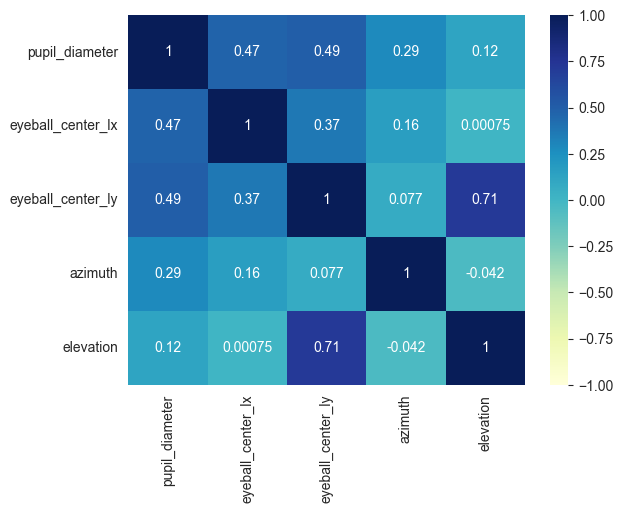

In [81]:
dataplot = sb.heatmap(X_to_corr.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1)

In [82]:
X = X_to_corr.values

In [83]:
X

array([[  4.48015785, -31.84849167,  15.02731323, -12.22711175,
         -7.32211426],
       [  4.46189022, -31.74098587,  14.92080688, -13.30777659,
         -7.17811047],
       [  4.472579  , -31.88853455,  14.87945938, -13.10721868,
         -7.24131869],
       ...,
       [  6.2565136 , -31.27894592,  15.84399796,   9.84390538,
         -1.07743903],
       [  6.27273893, -31.31751251,  15.89839935,   9.72961912,
         -0.98293251],
       [  6.28641796, -31.3586998 ,  15.82260895,   9.60025919,
         -0.83208713]])

In [84]:
y = labeled_data['name'].values

In [85]:
y

array(['navigation parameters', 'navigation parameters',
       'navigation parameters', ..., 'other buttons', 'other buttons',
       'other buttons'], dtype=object)

# Preprocessing

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
sc = StandardScaler()

In [88]:
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [89]:
X_train

array([[ 0.94642169,  0.09611779,  0.36563845,  1.90884078,  1.20288114],
       [ 0.8926116 ,  0.58583286, -0.24968891,  1.85505904,  1.0954159 ],
       [-0.97752938,  0.50236813, -0.94598533, -1.21119711,  0.62792036],
       ...,
       [ 1.47886292,  1.28501174,  1.59827905,  0.80208583,  1.00858277],
       [ 1.6815646 ,  2.34337598, -0.40920535,  0.46643282, -1.83983448],
       [-0.15265039,  0.27606223, -0.29294817, -0.12305054, -0.23270333]])

## K-nearest neighbors classifier

In [90]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[['navigation parameters' 'navigation parameters']
 ['navigation parameters' 'navigation parameters']
 ['navigation parameters' 'navigation parameters']
 ...
 ['navigation parameters' 'navigation parameters']
 ['navigation parameters' 'navigation parameters']
 ['navigation parameters' 'navigation parameters']]


In [92]:
confusion_matrix(y_test, y_pred)

array([[100,   6,   2,   0],
       [  4, 952,   5,   4],
       [  2,   4, 794,   0],
       [  0,   6,   1,  46]])

In [93]:
accuracy_score(y_test, y_pred)

0.9823468328141225